<a href="https://colab.research.google.com/github/tienvtt/Stock-Analysis-and-Prediction-Applying-Machine-Learning/blob/master/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**:
- Use mathematical and statistical techniques and to analyze patterns, trends
- Utilize machine learning algorithm to predict stock price.
- Compare stocks belonged to Financial Services: SSI, VND, VCI, VIX, HCM for data-driven decisions.

# **Install library and load data**

In [1]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

Cloning into 'vnquant'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 431 (delta 23), reused 22 (delta 22), pack-reused 392 (from 1)
Receiving objects: 100% (431/431), 1.06 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/vnquant
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/set

In [2]:
import pandas as pd
import vnquant.data as vnq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define stock symbols
symbols = ["SHB", "VHM", "FPT", "HPG","HCM"]

# Store DataFrames for each stock
stock_data = {}

for symbol in symbols:
    loader = vnq.DataLoader(
        symbols=symbol,
        start="2023-01-01",
        end="2025-03-21",
        minimal=True,
        data_source="cafe"
    )

    # Download and store DataFrame
    df = pd.DataFrame(loader.download())

    df.columns = df.columns.droplevel(level=1)

    stock_data[symbol] = df

    # Print first few rows for verification
    print(f"Data for {symbol}:")
    print(df.head(), "\n")


# Assign DataFrames to individual variables
df_shb = stock_data["SHB"]
df_vhm = stock_data["VHM"]
df_fpt = stock_data["FPT"]
df_hpg = stock_data["HPG"]
df_hcm = stock_data["HCM"]

[2025-03-25 18:06:31] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['SHB'] from CAFEF, start: 01/01/2023, end: 21/03/2025!
[2025-03-25 18:06:34] - Assitant - INFO      - download_one - line 94 - data SHB from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 18:06:34] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VHM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for SHB:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  SHB  12.05  11.65  11.85  11.75   11.75    74606600.0   
2025-03-20  SHB  11.90  11.50  11.65  11.75   11.75    79891400.0   
2025-03-19  SHB  11.80  11.40  11.50  11.65   11.65    68781700.0   
2025-03-18  SHB  11.70  11.10  11.25  11.60   11.60    71982900.0   
2025-03-17  SHB  11.40  10.90  10.95  11.25   11.25    94585500.0   

Attributes   value_match  
date                      
2025-03-21  8.834230e+11  
2025-03-20  9.347830e+11  
2025-03-19  8.011410e+11  
2025-03-18  8.175310e+11  
2025-03-17  1.066489e+12   



[2025-03-25 18:06:36] - Assitant - INFO      - download_one - line 94 - data VHM from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 18:06:36] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['FPT'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for VHM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  VHM  48.40  47.10  47.10  48.25   48.25    13695700.0   
2025-03-20  VHM  48.20  46.95  47.35  47.35   47.35    13458400.0   
2025-03-19  VHM  47.90  46.25  46.80  47.35   47.35    13442500.0   
2025-03-18  VHM  48.75  46.80  47.60  47.30   47.30    12239500.0   
2025-03-17  VHM  48.00  46.80  47.95  47.80   47.80    11017800.0   

Attributes   value_match  
date                      
2025-03-21  6.590010e+11  
2025-03-20  6.384460e+11  
2025-03-19  6.318710e+11  
2025-03-18  5.820090e+11  
2025-03-17  5.240910e+11   



[2025-03-25 18:06:38] - Assitant - INFO      - download_one - line 94 - data FPT from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 18:06:38] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HPG'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for FPT:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  FPT  129.0  125.0  125.0  128.0   128.0     6424800.0   
2025-03-20  FPT  126.8  124.5  124.6  125.0   125.0     8203400.0   
2025-03-19  FPT  130.6  123.5  130.1  124.6   124.6    18128400.0   
2025-03-18  FPT  132.2  130.0  130.1  130.0   130.0     5508500.0   
2025-03-17  FPT  132.1  129.6  131.6  130.0   130.0     6707000.0   

Attributes   value_match  
date                      
2025-03-21  8.202040e+11  
2025-03-20  1.027201e+12  
2025-03-19  2.288715e+12  
2025-03-18  7.197290e+11  
2025-03-17  8.748980e+11   



[2025-03-25 18:06:40] - Assitant - INFO      - download_one - line 94 - data HPG from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 18:06:40] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HCM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for HPG:
Attributes code   high    low  open  close  adjust  volume_match   value_match
date                                                                          
2025-03-21  HPG  27.25  27.05  27.1  27.15   27.15    18912200.0  5.135380e+11
2025-03-20  HPG  27.45  27.05  27.3  27.15   27.15    25022500.0  6.794540e+11
2025-03-19  HPG  27.60  27.10  27.6  27.25   27.25    37925600.0  1.036355e+12
2025-03-18  HPG  28.05  27.60  27.9  27.60   27.60    18741700.0  5.209910e+11
2025-03-17  HPG  28.15  27.75  27.9  27.85   27.85    19719700.0  5.514120e+11 



[2025-03-25 18:06:42] - Assitant - INFO      - download_one - line 94 - data HCM from 2023-01-01 to 2025-03-21 have already cloned!


Data for HCM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  HCM  32.15  31.85  32.00  31.85   31.85     7561400.0   
2025-03-20  HCM  32.45  31.70  32.00  32.05   32.05     7952100.0   
2025-03-19  HCM  32.00  31.35  31.65  31.95   31.95    10722700.0   
2025-03-18  HCM  32.40  31.75  32.35  31.75   31.75     8207900.0   
2025-03-17  HCM  32.30  31.80  32.00  32.30   32.30     5418900.0   

Attributes   value_match  
date                      
2025-03-21  2.416840e+11  
2025-03-20  2.546920e+11  
2025-03-19  3.398620e+11  
2025-03-18  2.629520e+11  
2025-03-17  1.735320e+11   



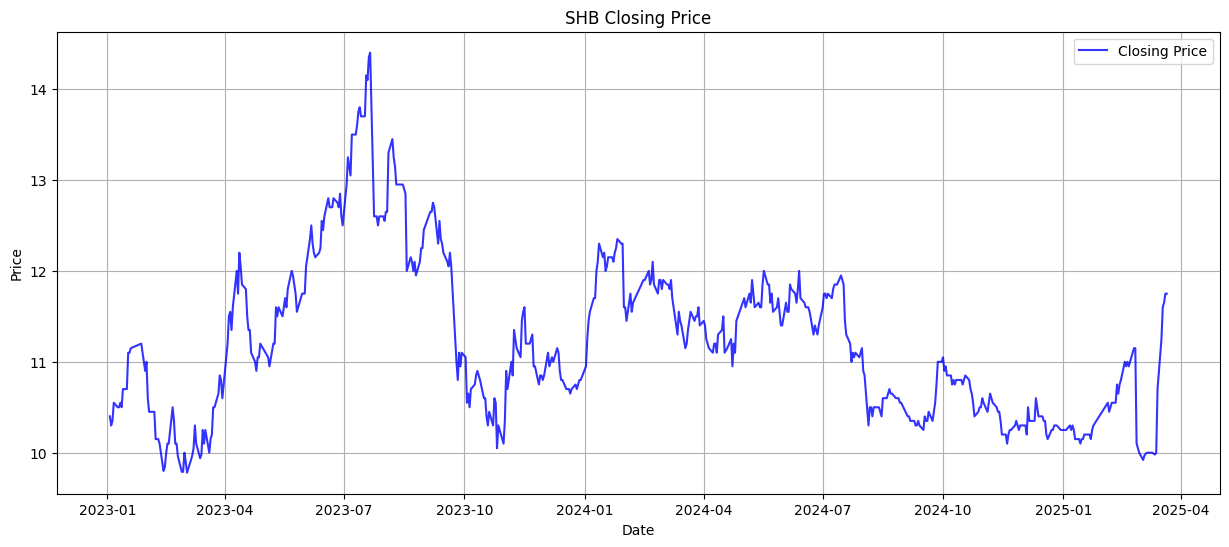

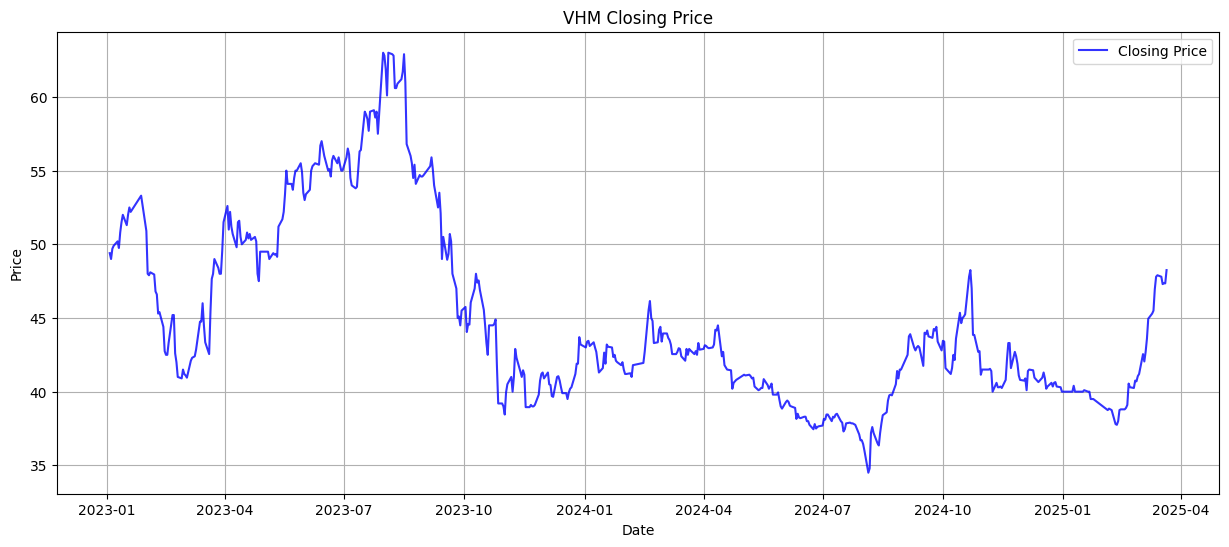

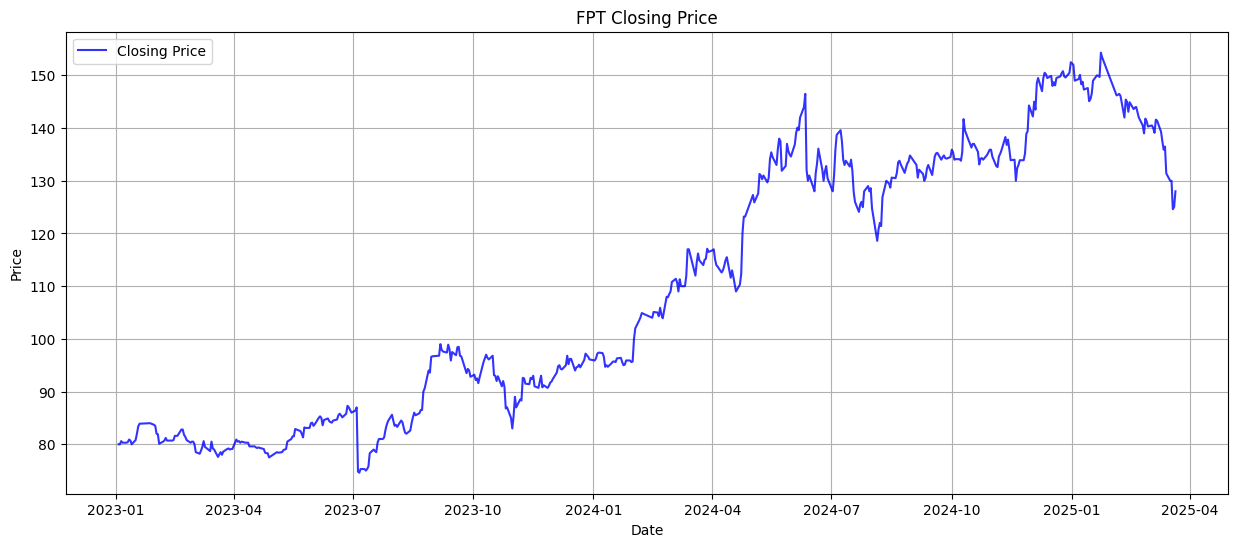

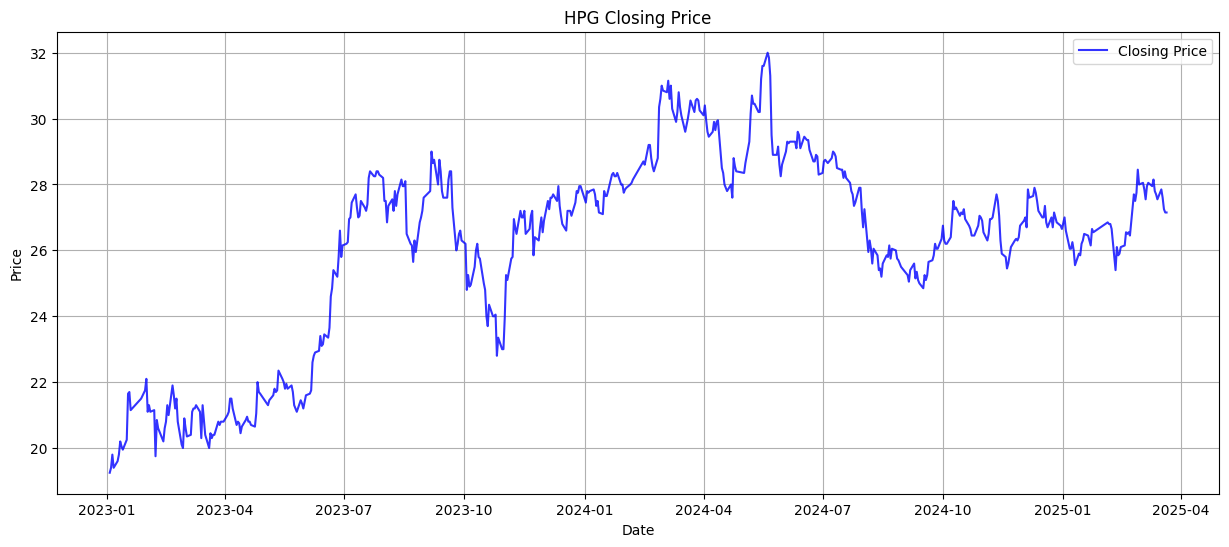

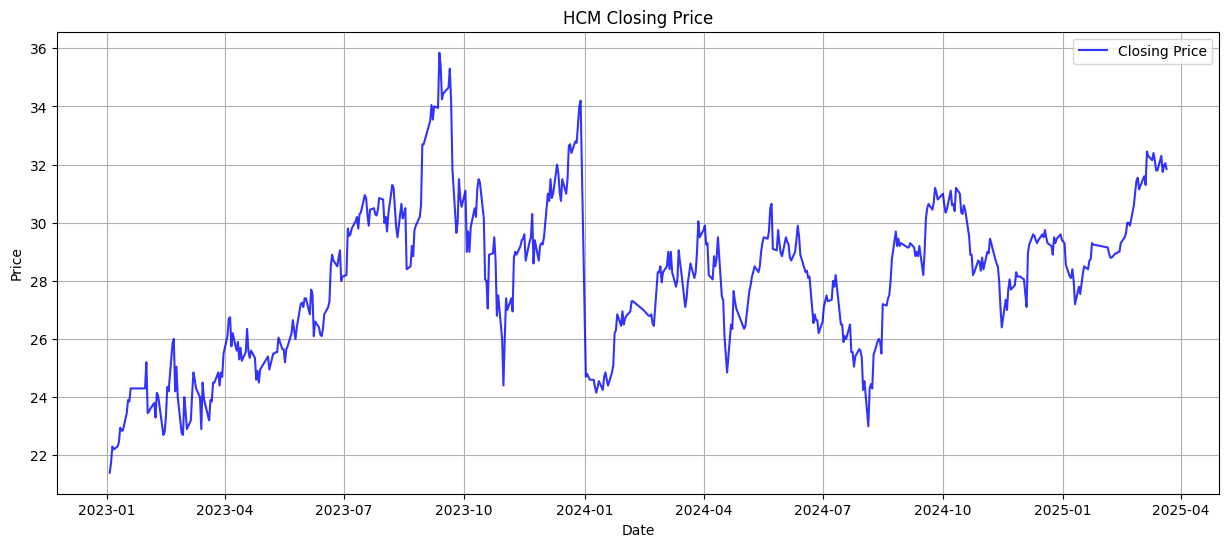

In [4]:
def plot_price_trend(df, symbol):
    """Plot Closing Price & SMA from a given start date."""
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.8)
    plt.title(f"{symbol} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
plot_price_trend(df_shb,"SHB")
plot_price_trend(df_vhm,"VHM")
plot_price_trend(df_fpt,"FPT")
plot_price_trend(df_hpg,"HPG")
plot_price_trend(df_hcm,"HCM")


In [5]:
def stock_info(df):
  print (df.info())
  print (df.isnull().sum())

stock_info(df_shb)
stock_info(df_vhm)
stock_info(df_fpt)
stock_info(df_hpg)
stock_info(df_hcm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          550 non-null    object 
 1   high          550 non-null    float64
 2   low           550 non-null    float64
 3   open          550 non-null    float64
 4   close         550 non-null    float64
 5   adjust        550 non-null    float64
 6   volume_match  550 non-null    float64
 7   value_match   550 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.7+ KB
None
Attributes
code            0
high            0
low             0
open            0
close           0
adjust          0
volume_match    0
value_match     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code   

# **PREPARE FOR TRAINING XGB MODEL**





In [6]:
df_shb = df_shb.sort_index()
df_vhm = df_vhm.sort_index()
df_fpt = df_fpt.sort_index()
df_hpg = df_hpg.sort_index()
df_hcm = df_hcm.sort_index()

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
def train_xgboost(df, test_size=0.2, cv_folds=3, **hyperparams):
    df = df.copy()
    df = df.sort_index(ascending=True)  # Sắp xếp theo thời gian
    df.drop(columns=['code'], inplace=True)  # Loại bỏ cột không cần thiết

    X = df.drop(columns=['close'])  # Biến độc lập
    y = df['close']  # Biến mục tiêu

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **hyperparams)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Actual vs Predicted Prices')
    plt.show()

    # Predict next 7 days
    future_dates = pd.date_range(start=y_test.index[-1], periods=8, freq='B')[1:]
    last_known_features = X.iloc[-1].values.reshape(1, -1)

    future_predictions = []
    for _ in range(7):
        future_price = model.predict(last_known_features)[0]
        future_predictions.append(future_price)
        last_known_features = np.roll(last_known_features, -1)
        last_known_features[0, -1] = future_price  # Cập nhật giá trị cuối cùng

    print("Future 7-day predictions:")
    for date, price in zip(future_dates, future_predictions):
        print(f"{date.date()}: {price}")



Training model for df_shb...
Model Evaluation:
MAE: 0.08283622915094559
MSE: 0.015358173613683489
RMSE: 0.12392809856397978
R2 Score: 0.8899320725654978


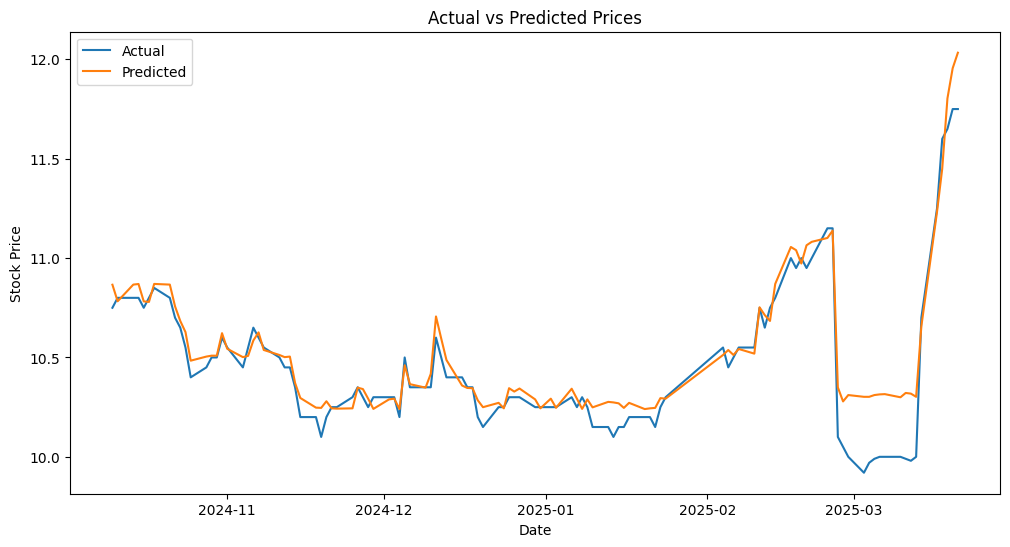

Future 7-day predictions:
2025-03-24: 12.033443450927734
2025-03-25: 12.066247940063477
2025-03-26: 11.911478042602539
2025-03-27: 12.560452461242676
2025-03-28: 14.167262077331543
2025-03-31: 12.783645629882812
2025-04-01: 12.12523078918457


In [16]:
# Train df_shb first
df_shb_hyperparams = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
print("Training model for df_shb...")
train_xgboost(df_shb, **df_shb_hyperparams)

Training model for df_shb...
Model Evaluation:
MAE: 0.05521443453702052
MSE: 0.007282369139397888
RMSE: 0.08533679827247966
R2 Score: 0.9989007854736685


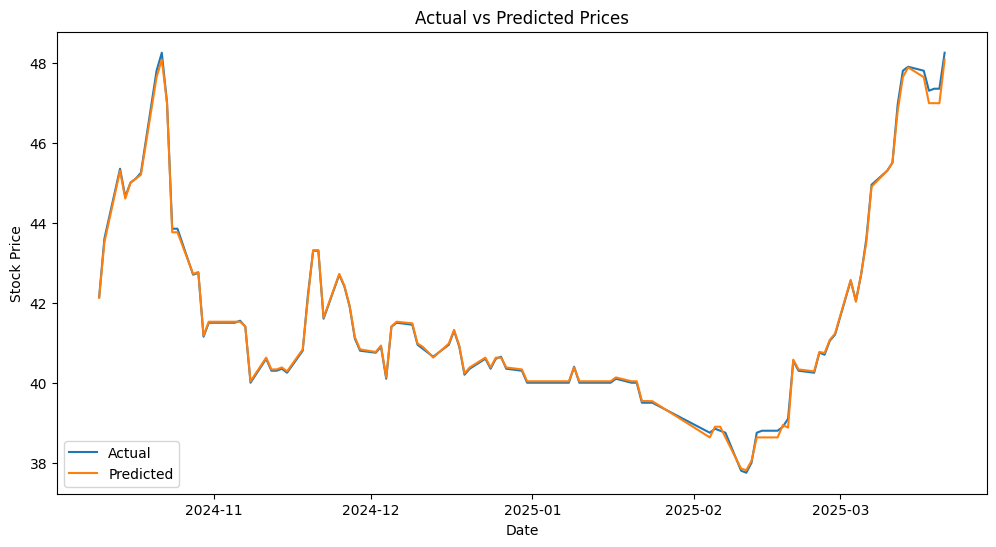

Future 7-day predictions:
2025-03-24: 48.08001708984375
2025-03-25: 60.43921661376953
2025-03-26: 60.43921661376953
2025-03-27: 47.982547760009766
2025-03-28: 60.97850799560547
2025-03-31: 60.97193908691406
2025-04-01: 47.93737030029297


In [17]:
# Train df_vhm first
df_vhm_hyperparams = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
print("Training model for df_shb...")
train_xgboost(df_vhm, **df_vhm_hyperparams)

Training model for df_shb...
Model Evaluation:
MAE: 2.5964705033735807
MSE: 13.234850267127717
RMSE: 3.637973373614452
R2 Score: 0.7217011063294148


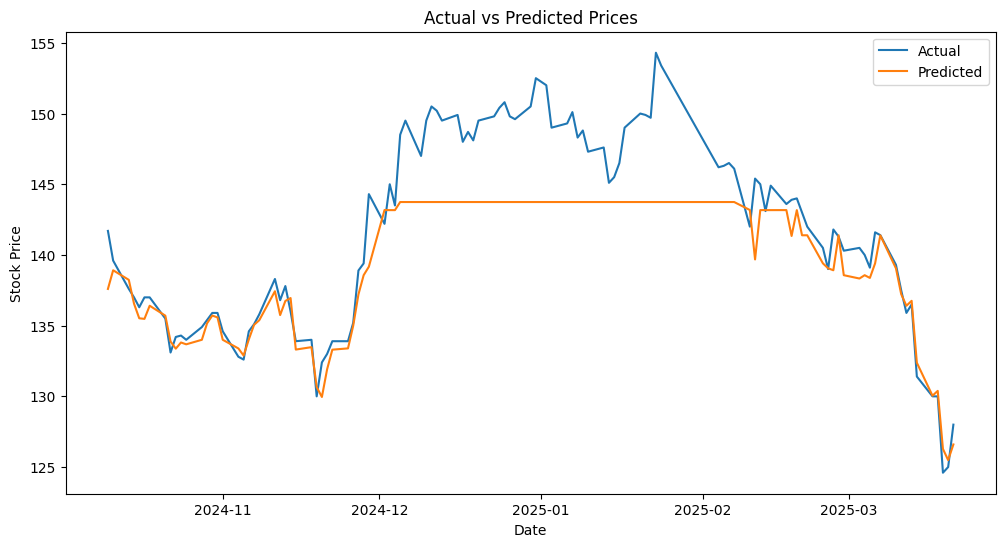

Future 7-day predictions:
2025-03-24: 126.5989761352539
2025-03-25: 125.2196044921875
2025-03-26: 126.02552032470703
2025-03-27: 135.49935913085938
2025-03-28: 143.74154663085938
2025-03-31: 133.66384887695312
2025-04-01: 126.2423095703125


In [19]:
df_fpt_hyperparams = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
print("Training model for df_shb...")
train_xgboost(df_fpt, **df_fpt_hyperparams)

Training model for df_shb...
Model Evaluation:
MAE: 0.1721932914040306
MSE: 0.04812641944003888
RMSE: 0.21937734486504953
R2 Score: 0.8923923781865962


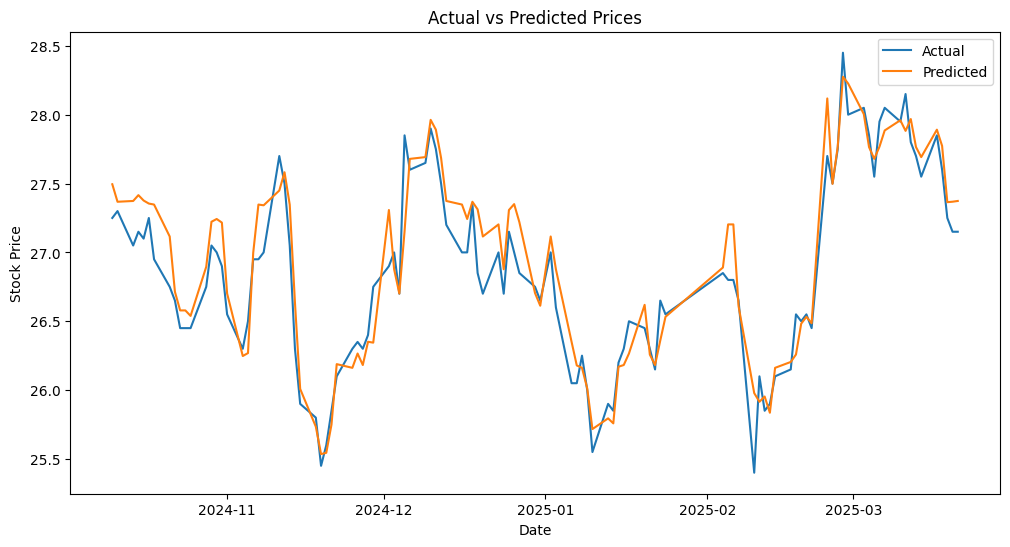

Future 7-day predictions:
2025-03-24: 27.37346076965332
2025-03-25: 27.29912757873535
2025-03-26: 27.31406593322754
2025-03-27: 27.552640914916992
2025-03-28: 30.90699005126953
2025-03-31: 29.98050308227539
2025-04-01: 27.44580841064453


In [20]:
df_hpg_hyperparams = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
print("Training model for df_shb...")
train_xgboost(df_hpg, **df_hpg_hyperparams)

Training model for df_shb...
Model Evaluation:
MAE: 0.25328083385120737
MSE: 0.1026487623566434
RMSE: 0.32038845540475297
R2 Score: 0.9476538081789364


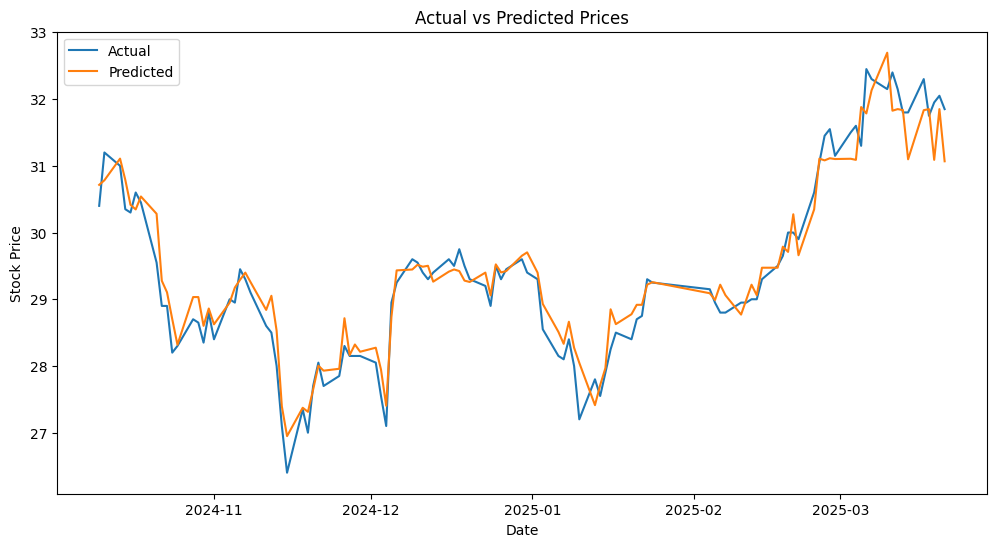

Future 7-day predictions:
2025-03-24: 31.06806182861328
2025-03-25: 31.066720962524414
2025-03-26: 31.039396286010742
2025-03-27: 32.088775634765625
2025-03-28: 35.35863494873047
2025-03-31: 34.13196563720703
2025-04-01: 30.769973754882812


In [21]:
df_hcm_hyperparams = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
print("Training model for df_shb...")
train_xgboost(df_hcm, **df_hcm_hyperparams)